In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [14]:
from inference.sample import StockSampler

m=10

sampler = StockSampler(array, tickers, dates, m=m)

In [15]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [16]:
sampler.sample(100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:26<00:00,  5.67s/it]


In [17]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

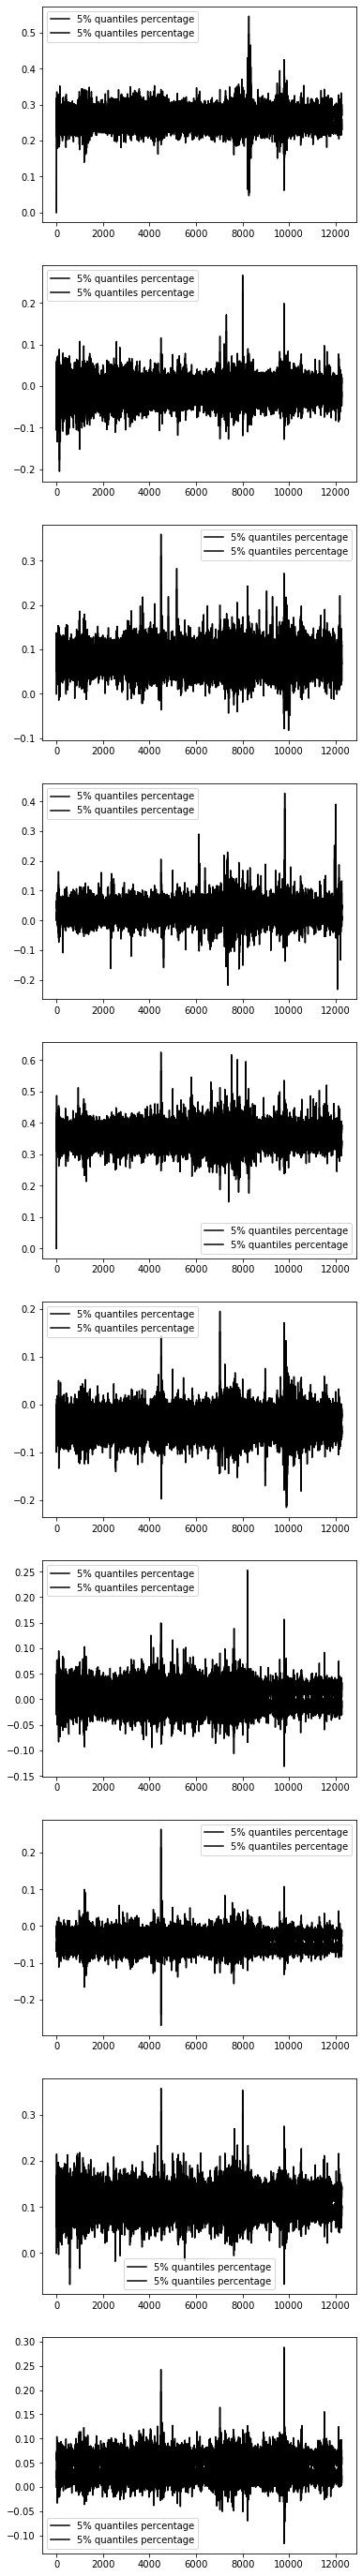

In [18]:
analyser.plot_quantiles_percentage()

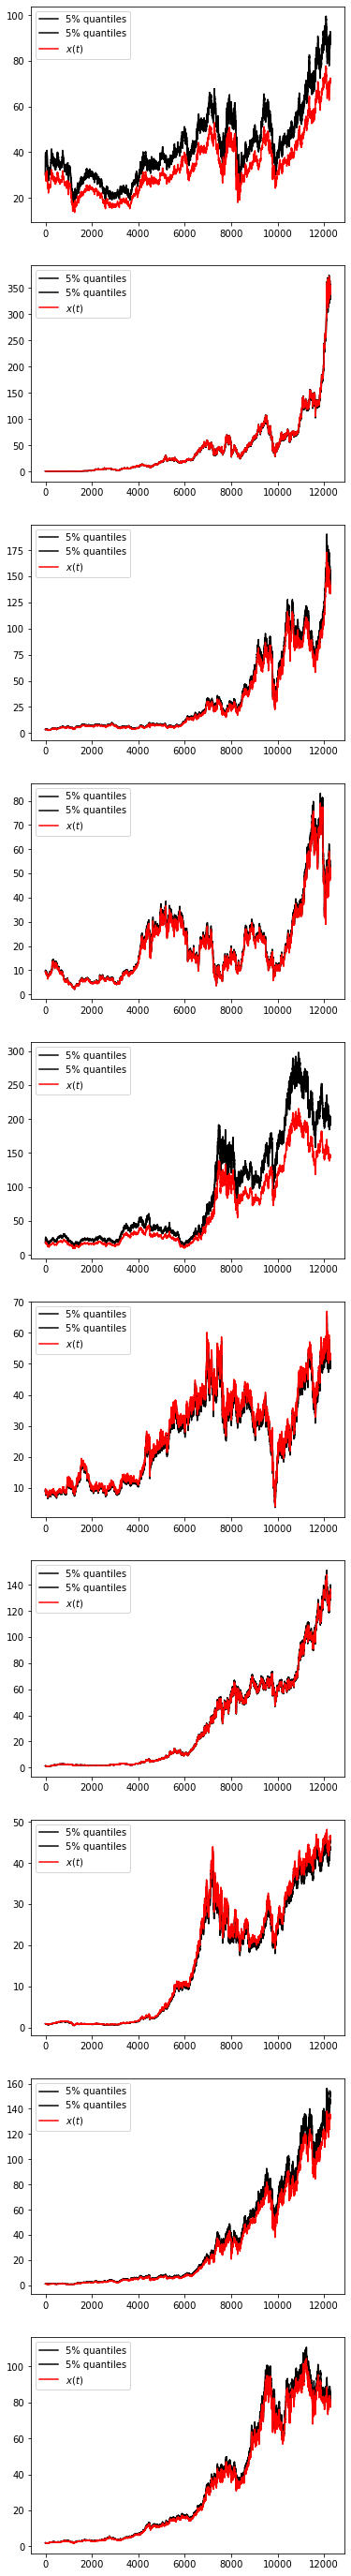

In [23]:
analyser.plot_quantiles()

In [19]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

No handles with labels found to put in legend.


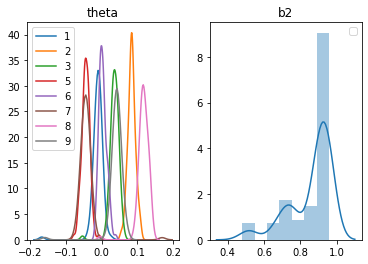

In [20]:
analyser.plot_parameter_distributions(observed_tickers)

In [21]:
sampler.tickers

['AEP', 'BA', 'CAT', 'FL', 'IBM', 'IP', 'JNJ', 'KO', 'UTX', 'XOM']

In [22]:
sampler.b2

array([0.47969533, 0.71929614, 0.71929614, 0.71929614, 0.52402339,
       0.52402339, 0.52402339, 0.52402339, 0.88724746, 0.88724746,
       0.88724746, 0.88724746, 0.88724746, 0.88724746, 0.88724746,
       0.88724746, 0.67189052, 0.85454845, 0.830128  , 0.94236933,
       0.94236933, 0.94236933, 0.94236933, 0.94236933, 0.94236933,
       0.94236933, 0.94236933, 0.9591279 , 0.9591279 , 0.9591279 ,
       0.9591279 , 0.9591279 , 0.95741383, 0.95741383, 0.95741383,
       0.66582898, 0.91658273, 0.91658273, 0.91658273, 0.91658273,
       0.91658273, 0.91658273, 0.91658273, 0.91658273, 0.91658273,
       0.91658273, 0.91658273, 0.91658273, 0.91658273, 0.95383969,
       0.95383969, 0.95383969, 0.95383969, 0.95383969, 0.95383969,
       0.95383969, 0.95383969, 0.95383969, 0.95383969, 0.95383969,
       0.77261121, 0.77261121, 0.77261121, 0.77261121, 0.77261121,
       0.77261121, 0.73187378, 0.73187378, 0.73187378, 0.73187378,
       0.73187378, 0.73187378, 0.73187378, 0.73187378, 0.73187